# Lab Clustering Priam CARDOUAT

## Question 1 : 

We compute the clusters thanks to KMeans from sklearn with the default parameters for kmeans (init='k-means++'). Then we compute the SSE using the euclidean distance between the point of a cluster and the centroid of this cluster.

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import csv


reader = csv.reader(open('data.csv', newline=''))


list_stock=[]
list_companies=[]

for row in reader:
    temp=[]
    list_companies.append(row[0])
    for i in range(1,len(row)):
        temp.append(row[i])
    list_stock.append(temp)

del list_stock[0]
del list_companies[0]

X=np.array(list_stock, dtype='float32')

kmeans = KMeans(init='k-means++', n_clusters=8, max_iter=300, n_init=10).fit(X)

clusters=[]
for k in range(8):
    clusters.append([])
for i in range(len(kmeans.labels_)):
    clusters[kmeans.labels_[i]].append(list_companies[i])
    
print(clusters)
    
def sse(kmeans):
    sse=0
    temp=np.array(list_stock, dtype='float32')
    for k in range(len(list_companies)):
        for i in range(len(list_stock[0])):
            sse=sse+((kmeans.cluster_centers_[kmeans.labels_[k]][i]-temp[k][i])**2)
    return sse
    
print("SSE =",sse(kmeans))

[['American Express', 'Boeing', 'Microsoft', 'IBM', 'Walt Disney', 'Intel', 'General Electric', 'United Technologies', 'Travelers', 'JPMorgan Chase', '3M', 'Johnson & Johnson'], ['Cisco Systems'], ['Kraft', 'Verizon', 'The Home Depot', 'Procter & Gamble', 'Wal-Mart', 'AT&T', 'Merck', 'McDonalds', 'Coca-Cola'], ['Hewlett-Packard'], ['Chevron', 'Pfizer', 'ExxonMobil'], ['DuPont', 'Caterpillar'], ['Alcoa'], ['Bank of America']]
SSE = 1531.5042758289073


## Question 2 

In order to decrease the SSE, we can change the values of max_iter and n_init, which are the parameters that will impact the result the most (we consider that k-means++ is the default parameter)

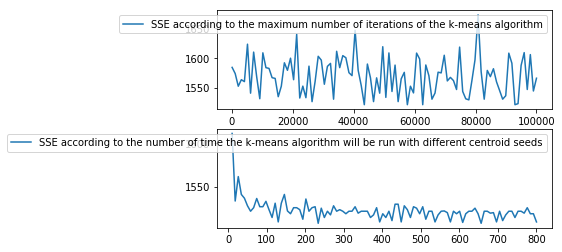

1522.2886166692108 43490.909090909096
1508.434105546156 233.43434343434345


In [3]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(100,100000,100)
a=np.linspace(10,800,100)
y=[]
z=[]
for i in x:
    y.append(sse(KMeans(init='k-means++', n_clusters=8, max_iter=i, n_init=10).fit(X)))
for j in a:
    z.append(sse(KMeans(init='k-means++', n_clusters=8, max_iter=300, n_init=int(j)).fit(X)))
plt.subplot(211)
plt.plot(x,y,label="SSE according to the maximum number of iterations of the k-means algorithm")
plt.legend()
plt.subplot(212)
plt.plot(a,z,label="SSE according to the number of time the k-means algorithm will be run with different centroid seeds")
plt.legend()
plt.show()
print(min(y),x[y.index(min(y))])
print(min(z),a[z.index(min(z))])

### a) 
n_init is the number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. Thus increasing its value might lead to a better result, because we can assume that we would have encountered better centroid seeds in the process and thus the clustering would be better (on the contrary decreasing it would lead to worse results).

The parameter max_iter is the maximum number of iterations of the k-means algorithm for a single run. Hence, increasing it might lead to better results as well. But at some point, increasing it more might not lead to better results necessarly and decreasing it too, except if it is decreased too much.

### b)

According to the graphs, we see that increasing or decreasing max_iter (the maximum number of tierations of the k-means algorithm) does not always improve the result. The same holds for n_init : we see that increasing it improve the result, but the result can be the same for a lower value of n_init : thus, increasing n_init generally improve the result but NOT always.

### c)

We obtained the SSE displayed on the graph, the minimum SSE being 1508.434105546156 for n_init=233 and max_iter=300

## Question 3

In [88]:
kmeans = KMeans(init='k-means++', n_clusters=8, max_iter=300, n_init=233).fit(X)

clusters=[]
for k in range(8):
    clusters.append([])
for i in range(len(kmeans.labels_)):
    clusters[kmeans.labels_[i]].append(list_companies[i])
    
print(clusters)
print("SSE =",sse(kmeans))

[['Kraft', 'Verizon', 'Procter & Gamble', 'AT&T', 'Merck', 'McDonalds', 'Coca-Cola', 'Johnson & Johnson'], ['DuPont', 'Caterpillar', 'Alcoa'], ['American Express', 'Boeing', 'Microsoft', 'Walt Disney', 'JPMorgan Chase'], ['Chevron', 'Pfizer', 'ExxonMobil'], ['Cisco Systems'], ['Hewlett-Packard'], ['IBM', 'The Home Depot', 'Intel', 'Wal-Mart', 'General Electric', 'United Technologies', 'Travelers', '3M'], ['Bank of America']]
SSE = 1508.434105546156


We get the following clustering with the n_init=233 and max_iter=300 (the SSE is minimum for these values) : 

[['Kraft', 'Verizon', 'Procter & Gamble', 'AT&T', 'Merck', 'McDonalds', 'Coca-Cola', 'Johnson & Johnson'], ['DuPont', 'Caterpillar', 'Alcoa'], ['American Express', 'Boeing', 'Microsoft', 'Walt Disney', 'JPMorgan Chase'], ['Chevron', 'Pfizer', 'ExxonMobil'], ['Cisco Systems'], ['Hewlett-Packard'], ['IBM', 'The Home Depot', 'Intel', 'Wal-Mart', 'General Electric', 'United Technologies', 'Travelers', '3M'], ['Bank of America']]

Thus we can try to label the clusters as follows :

[alimentation stocks, chemical industry stocks, finance stocks, oil stocks, network stocks, electronics stocks, distribution and technology stocks, banking stocks]